Alex Weech  
ATMOS 6040 / Spring 2019  
Chapter 4  
Requires ../data/snotel_wtr_yr_2018.csv  

In [1]:
import CSV
using DataFrames
label = ["year", "TGL", "BLP", "BLT", "FRM", "PAR", "TIM", "PAY"]
input = CSV.read("../data/snotel_wtr_yr_2018.csv", header=label)
# First column: year
yr = input.year
tot = mapcols(f->f*2.54, input[:, 2:end])
# tot[:, 1] = tony grove lake
# tot[:, 2] = ben lomond peak
# tot[:, 3] = ben lomond trail
# tot[:, 4] = farmington
# tot[:, 5] = parleys
# tot[:, 6] = timpanogos
# tot[:, 7] = payson

n = size(yr, 1)

38

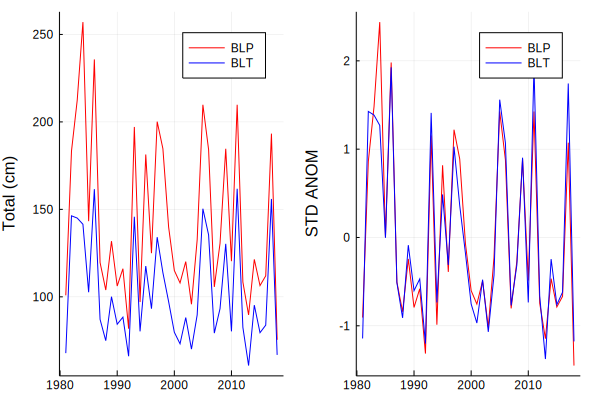

In [2]:
# Plot blt and blp totals
using Plots
using Statistics
gr()
p1 = plot(yr, tot.BLP, color="red", label=label[3], ylabel="Total (cm)")
plot!(p1, yr, tot.BLT, color="blue", label=label[4])

# For convenience and to match notes, define blt as x and blp as y
x = tot.BLT
y = tot.BLP

xm = mean(x)
ym = mean(y)
xs = std(x, corrected=false)
ys = std(y, corrected=false)

# Anomalies
xprime = x .- xm
yprime = y .- ym

# Standardized anomalies
xstar = xprime / xs
ystar = yprime / ys

# Plot blt and blp standardized anomalies
p2 = plot(yr, ystar, color="red", label=label[3], ylabel="STD ANOM")
plot!(p2, yr, xstar, color="blue", label=label[4])

plot(p1, p2, layout=2)

In [3]:
# Brute force way to compute regression
# Method 1
covar_1 = 0
varx_1 = 0
vary_1 = 0

for i in eachindex(xprime)
    covar_1 += xprime[i] * yprime[i]
    varx_1 += xprime[i] * xprime[i]
    vary_1 += yprime[i] * yprime[i]
end

covar_1 /= n
varx_1 /= n
vary_1 /= n

b_1 = covar_1 / varx_1
r_1 = covar_1 / sqrt(varx_1*vary_1)
sdx_1 = sqrt(varx_1)
sdy_1 = sqrt(vary_1)

46.70101381903569

In [4]:
# Linear algebry way to compute
covar_2 = transpose(xprime)*yprime
varx_2 = transpose(xprime)*xprime
vary_2 = transpose(yprime)*yprime
covar_2 /= n
varx_2 /= n
vary_2 /= n

b_2 = covar_2 / varx_2
r_2 = covar_2 / sqrt(varx_2*vary_2)
sdx_2 = sqrt(varx_2)
sdy_2 = sqrt(vary_2)

46.70101381903568

In [5]:
# Compute estimate of y over range of xs
# (we can choose whatever range of xs we want)
xhat = collect(-50:5:75)
yhat = b_2 * xhat

# Add mean back in
XH = xm .+ xhat
YH = ym .+ yhat

26-element Array{Float64,1}:
  70.25204107204938
  77.54374749116023
  84.83545391027108
  92.12716032938194
  99.41886674849279
 106.71057316760363
 114.00227958671448
 121.29398600582533
 128.58569242493618
 135.87739884404704
 143.1691052631579 
 150.46081168226874
 157.7525181013796 
 165.04422452049045
 172.3359309396013 
 179.62763735871215
 186.91934377782297
 194.21105019693385
 201.50275661604468
 208.79446303515556
 216.08616945426638
 223.37787587337726
 230.6695822924881 
 237.96128871159894
 245.2529951307098 
 252.54470154982064

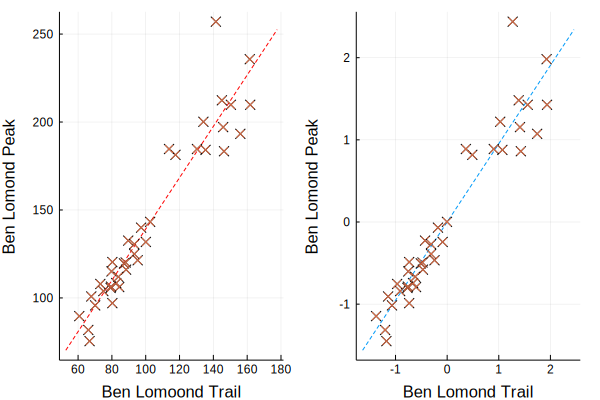

In [6]:
p1 = plot(XH, YH, color="red", style=:dash, label="", xlabel="Ben Lomoond Trail", ylabel="Ben Lomond Peak")
scatter!(p1, x, y, m=:xcross, label="")

p2 = plot(xhat/xs, yhat/ys, style=:dash, label="", xlabel="Ben Lomond Trail", ylabel="Ben Lomond Peak")
scatter!(p2, xstar, ystar, m=:xcross, label="")

plot(p1, p2, layout=2)

In [7]:
# Polytool section

In [8]:
import StatsBase
rhop = cor(x, y)
rhos = StatsBase.corspearman(x, y)

0.9556747291233446

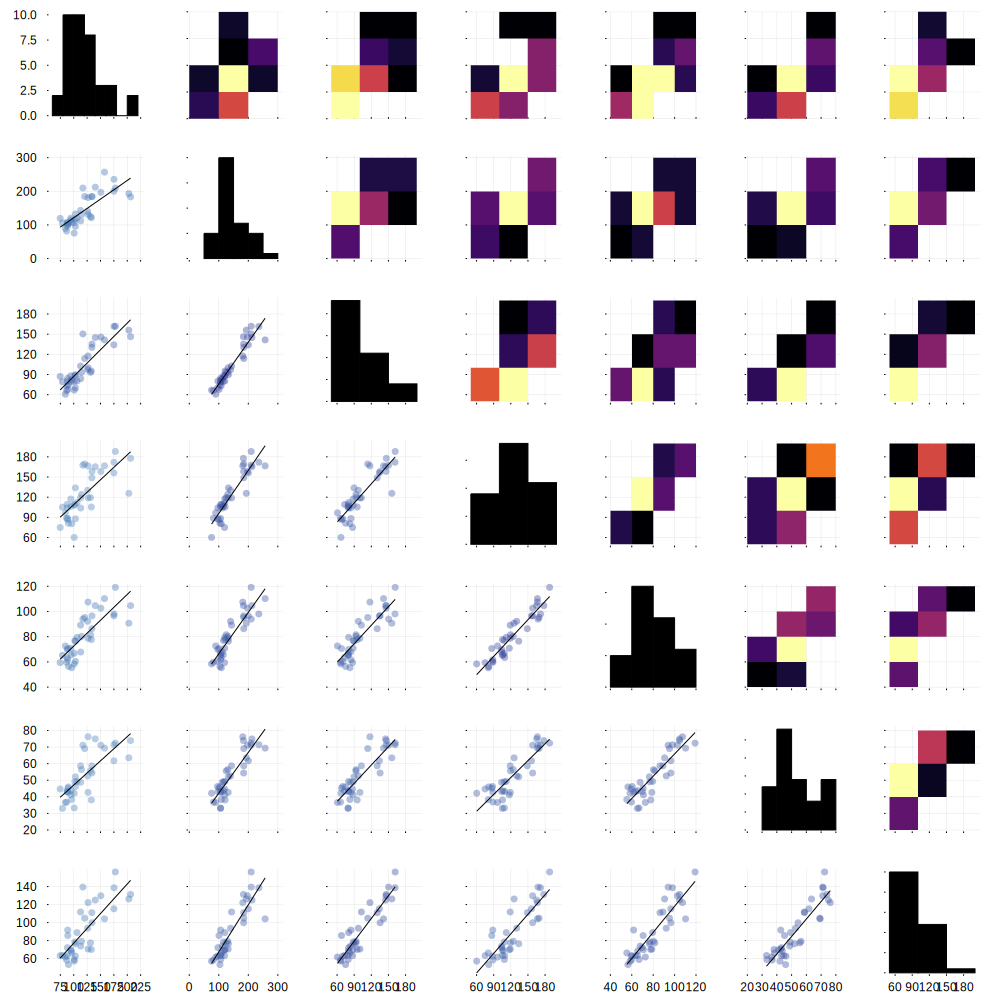

In [9]:
# Deal with all 7 time series at once
import StatsPlots
gr()
xt = convert(Matrix, tot)
StatsPlots.corrplot(xt, size=(1000, 1000))
#xlabel!("Precipitation (cm)")
#title!("SNOTEL Total Precipitation: Alex Weech 2/8/2019")

In [10]:
xtm = mean(xt)
xts = std(xt)
no = 7

# Anomalies
xtp = xt .- fill(xtm, n, 1)

# Standardized anomalies
xstar = xtp ./ fill(xts, n, 1)

38×7 Array{Float64,2}:
 -0.30986     -0.0226088  -0.817133   …  -0.749904   -1.36108   -0.389312 
  2.51376      1.9637      1.07139        0.0690671  -0.670451   0.710798 
  0.924708     2.66044     1.04083        0.0690671  -0.646004   0.558005 
  1.34031      3.7361      0.955267       0.203525   -0.780462   0.0568436
  0.264642     0.998049    0.0201733     -0.303748   -1.03715    0.240195 
  1.76813      3.22272     1.43809    …  -0.0898377  -0.731568   0.888038 
 -0.652116     0.429659   -0.352642      -1.01882    -1.3733    -0.927144 
 -0.279301     0.0507319  -0.646004      -1.09216    -1.34274   -1.1655   
  0.600787     0.723021   -0.0409439     -0.554329   -1.42219   -0.749904 
 -0.315971     0.105737   -0.419871      -0.963814   -1.42219   -0.242631 
  0.00794983   0.344095   -0.322083   …  -0.597111   -1.2694    -0.56044  
 -0.364865    -0.480988   -0.859915      -1.01271    -1.56276   -1.04327  
  1.17529      2.29373     1.05917        0.0201733  -0.73768    0.674128 
  

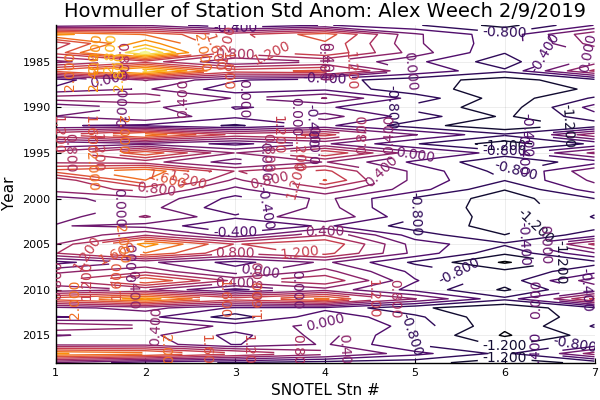

In [11]:
# Plot hovmuller diagram of stndardized temporal anomalies
pyplot()
xa = 1:1:no
contour(xa, yr, xstar, yflip=:true, ylabel="Year", xlabel="SNOTEL Stn #", contour_labels=true, colorbar=false,
        title="Hovmuller of Station Std Anom: Alex Weech 2/9/2019")

In [ ]:
# Linear algebra way to compute cross correlations
rho_1 = transpose(xstar) * xstar / no

# Direct calculation
rho_2 = cor(xt)

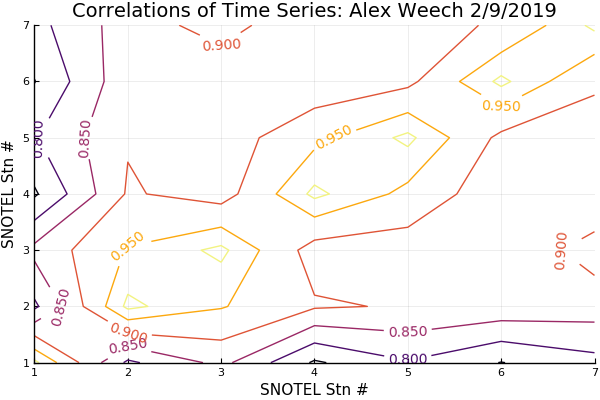

In [13]:
contour(rho_2, levels=reverse([0.99; 0.95:-0.05:0.65]), contour_labels=true,
        xlabel="SNOTEL Stn #", ylabel="SNOTEL Stn #", colorbar=false
        title="Correlations of Time Series: Alex Weech 2/9/2019")